In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('shark_clean.csv')

In [3]:
df.head()

,Unnamed: 0,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal (Y/N),Time,Species
0,0,09-Oct-2020,2020.0,Unprovoked,AUSTRALIA,Western Australia,Kelp Beds Beach (Kelpies),Surfing,M,Fatal,Y,10h45,Not Available
1,1,07-Oct-2020,2020.0,Unprovoked,USA,Florida,"Miami Beach, Miami-Dade County",Body Surfing,M,Survived,N,Afternoon,Blacktip shark
2,2,04-Oct-2020,2020.0,Unprovoked,AUSTRALIA,Western Australia,"Toms Surf break, Hamersley Pool, North Beach, ...",Surfing,M,No Injury,N,10h45,Bronze whaler 1.5m
3,4,20-Sep-2020,2020.0,Unprovoked,USA,Florida,"Sombero Key Light, Monroe County",Snorkeling,M,Survived,N,10h30,Bull shark
4,5,17-Sep-2020,2020.0,Provoked,AUSTRALIA,Queensland,Fraser Island,Fishing,M,Survived,N,16h00,"""whitetip shark"""


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Attaks per year

In [5]:
total_year =  df.groupby('Year').count()

In [6]:
total_year.reset_index(inplace=True)

In [7]:
total_year = total_year[108:]

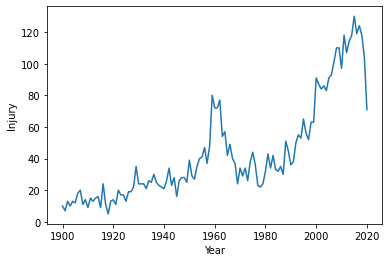

In [8]:
sns.lineplot(x='Year', y='Injury', data=total_year);

In [9]:
provoked = df[df.Type == 'Provoked']

In [10]:
p_group = provoked.groupby('Year').count()
p_group.reset_index(inplace=True)

In [11]:
p_group = p_group[24:]

In [12]:
unprovoked  = df[df.Type == 'Unprovoked']
u_group = unprovoked.groupby('Year').count()
u_group.reset_index(inplace=True)

In [13]:
u_group = u_group[103:]

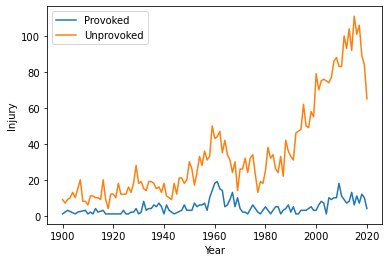

In [14]:
sns.lineplot(x='Year', y='Injury', data=p_group, legend='brief', label="Provoked");
sns.lineplot(x='Year', y='Injury', data=u_group, label = 'Unprovoked')

# Attacks per month

In [34]:
month = df.copy()

In [35]:
for i, d in enumerate(month['Date']):
    month['Date'][i] = d[3:6]

C:\Users\bdtol\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
month_total = month.groupby('Date').count()

In [37]:
month_total.reset_index(inplace=True)

In [38]:
month_total = month_total[83:95]

In [39]:
month_total

,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal (Y/N),Time,Species
83,Apr,341,341,341,341,341,341,341,341,341,341,341
84,Aug,465,465,465,465,465,465,465,465,465,465,465
85,Dec,345,345,345,345,345,345,345,345,345,345,345
86,Feb,308,308,308,308,308,308,308,308,308,308,308
87,Jan,401,401,401,401,401,401,401,401,401,401,401
88,Jul,538,538,538,538,538,538,538,538,538,538,538
89,Jun,389,389,389,389,389,389,389,389,389,389,389
90,Mar,330,330,330,330,330,330,330,330,330,330,330
91,May,330,330,330,330,330,330,330,330,330,330,330
92,Nov,330,330,330,330,330,330,330,330,330,330,330


In [40]:
month_total = month_total.reindex([87,86,90,83,91,89,88,84,94,93,92,85])

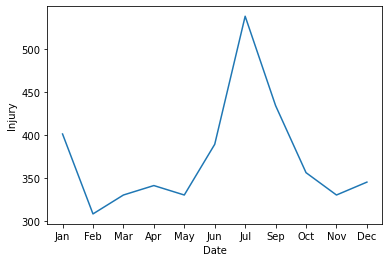

In [41]:
sns.lineplot(x='Date', y='Injury', data=month_total, sort=False);

In [62]:
provoked = month[month.Type == 'Provoked']

In [63]:
p_group = provoked.groupby('Date').count()
p_group.reset_index(inplace=True)

In [64]:
p_group = p_group[20:32]

In [65]:
p_group

,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal (Y/N),Time,Species
20,Apr,31,31,31,31,31,31,31,31,31,31,31
21,Aug,50,50,50,50,50,50,50,50,50,50,50
22,Dec,30,30,30,30,30,30,30,30,30,30,30
23,Feb,34,34,34,34,34,34,34,34,34,34,34
24,Jan,36,36,36,36,36,36,36,36,36,36,36
25,Jul,58,58,58,58,58,58,58,58,58,58,58
26,Jun,36,36,36,36,36,36,36,36,36,36,36
27,Mar,34,34,34,34,34,34,34,34,34,34,34
28,May,43,43,43,43,43,43,43,43,43,43,43
29,Nov,33,33,33,33,33,33,33,33,33,33,33


In [70]:
p_group = p_group.reindex([24,23,27,20,28,26,25,21,31,30,29,22])

In [67]:
unprovoked  = month[month.Type == 'Unprovoked']
u_group = unprovoked.groupby('Date').count()
u_group.reset_index(inplace=True)

In [68]:
u_group = u_group[73:85]

In [69]:
u_group

,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal (Y/N),Time,Species
73,Apr,297,297,297,297,297,297,297,297,297,297,297
74,Aug,388,388,388,388,388,388,388,388,388,388,388
75,Dec,277,277,277,277,277,277,277,277,277,277,277
76,Feb,236,236,236,236,236,236,236,236,236,236,236
77,Jan,315,315,315,315,315,315,315,315,315,315,315
78,Jul,424,424,424,424,424,424,424,424,424,424,424
79,Jun,324,324,324,324,324,324,324,324,324,324,324
80,Mar,257,257,257,257,257,257,257,257,257,257,257
81,May,257,257,257,257,257,257,257,257,257,257,257
82,Nov,252,252,252,252,252,252,252,252,252,252,252


In [71]:
u_group = u_group.reindex([77,76,80,73,81,79,78,74,84,83,82,75])

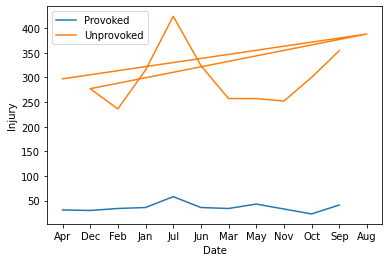

In [72]:
sns.lineplot(x='Date', y='Injury', data=p_group, label="Provoked");
sns.lineplot(x='Date', y='Injury', data=u_group, label = 'Unprovoked');